# Visualization using Matplotlib

Data visualization is one of the most essential steps in understanding the data at hand and the relations that can be drawn amongst various features and labels. While there are many libraries, Matplotlib forms the basics for data visualization and this notebook deals with its basics and common usage.

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

We will use the population dataset available on Kaggle to understand how we can leverage the power of visualizations to actually draw meaningful conclusions.

## Import dataset

We will import the dataset as a Panda's dataframe in the variable `dataset`.
However, we must first take a look at the data file. We find that first `4` rows can be skipped and then we can read the data into the variable.

In [2]:
dataset = pd.read_csv('dataset.csv', skiprows=4)
dataset.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.972222,312.366667,314.983333,316.827778,318.666667,...,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111,NaN,NaN
1,Andorra,AND,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.587234,32.714894,34.914894,37.170213,39.470213,...,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553,NaN,NaN
2,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.038148,14.312061,14.599692,14.901579,15.218206,...,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649,NaN,NaN
3,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.305195,4.384299,4.464433,4.544558,4.624228,...,15.915819,16.459536,17.020898,17.600302,18.196544,18.808215,19.433323,20.070565,NaN,NaN
4,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,...,107.566204,106.843759,106.314635,106.013869,105.848431,105.717226,105.607810,105.444051,NaN,NaN


It appears that we can either keep the `Country Name` or the `Country Code`. For easy reference, let's keep the country name. The columns `Indicator Name` and `Indicator Code` are not required.
Columns `1960` and `2016` has values represented as `NaN` which means `Not a Number` and hence we can drop those columns too. Finally, the last column is unnamed and also has `NaN` values so we drop it too.

In [3]:
dataset.drop(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '2016', 'Unnamed: 61'],
             axis = 1, inplace = True)
dataset.head(5)

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,307.972222,312.366667,314.983333,316.827778,318.666667,320.622222,322.494444,324.361111,326.244444,...,560.166667,562.322222,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111
1,Andorra,30.587234,32.714894,34.914894,37.170213,39.470213,41.800000,44.159574,46.570213,49.065957,...,177.389362,180.591489,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553
2,Afghanistan,14.038148,14.312061,14.599692,14.901579,15.218206,15.545203,15.881812,16.235931,16.618433,...,38.574296,39.637202,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649
3,Angola,4.305195,4.384299,4.464433,4.544558,4.624228,4.703271,4.782892,4.865721,4.955244,...,14.872437,15.387749,15.915819,16.459536,17.020898,17.600302,18.196544,18.808215,19.433323,20.070565
4,Albania,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,71.737153,73.805547,75.974270,...,109.217044,108.394781,107.566204,106.843759,106.314635,106.013869,105.848431,105.717226,105.607810,105.444051


The dataset has countries where all information is not available and hence, it's better to drop such rows as they provide no useful information.

In [4]:
dataset.dropna(how = 'any', axis = 0, inplace = True)
dataset.isnull().sum()

Country Name    0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015      

## Visualization

Now that our data is imported and setup to be visualized, we can begin working with matplotlib.
We begin by analysing Aruba's population density. Firstly, we take the x-axis values as years and the y-axis values as the population density over the years for Aruba.

### Line Plot

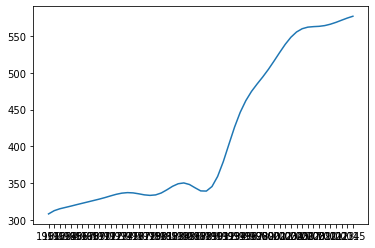

In [5]:
x = dataset.columns[1:]
y = dataset.iloc[0][1:]
country = dataset.iloc[0][0]
plt.plot(x, y)

The plot seems right but the years are overlapping and there is no indication for the axis. We will now use various customizations to make the plot more descriptive and readable.

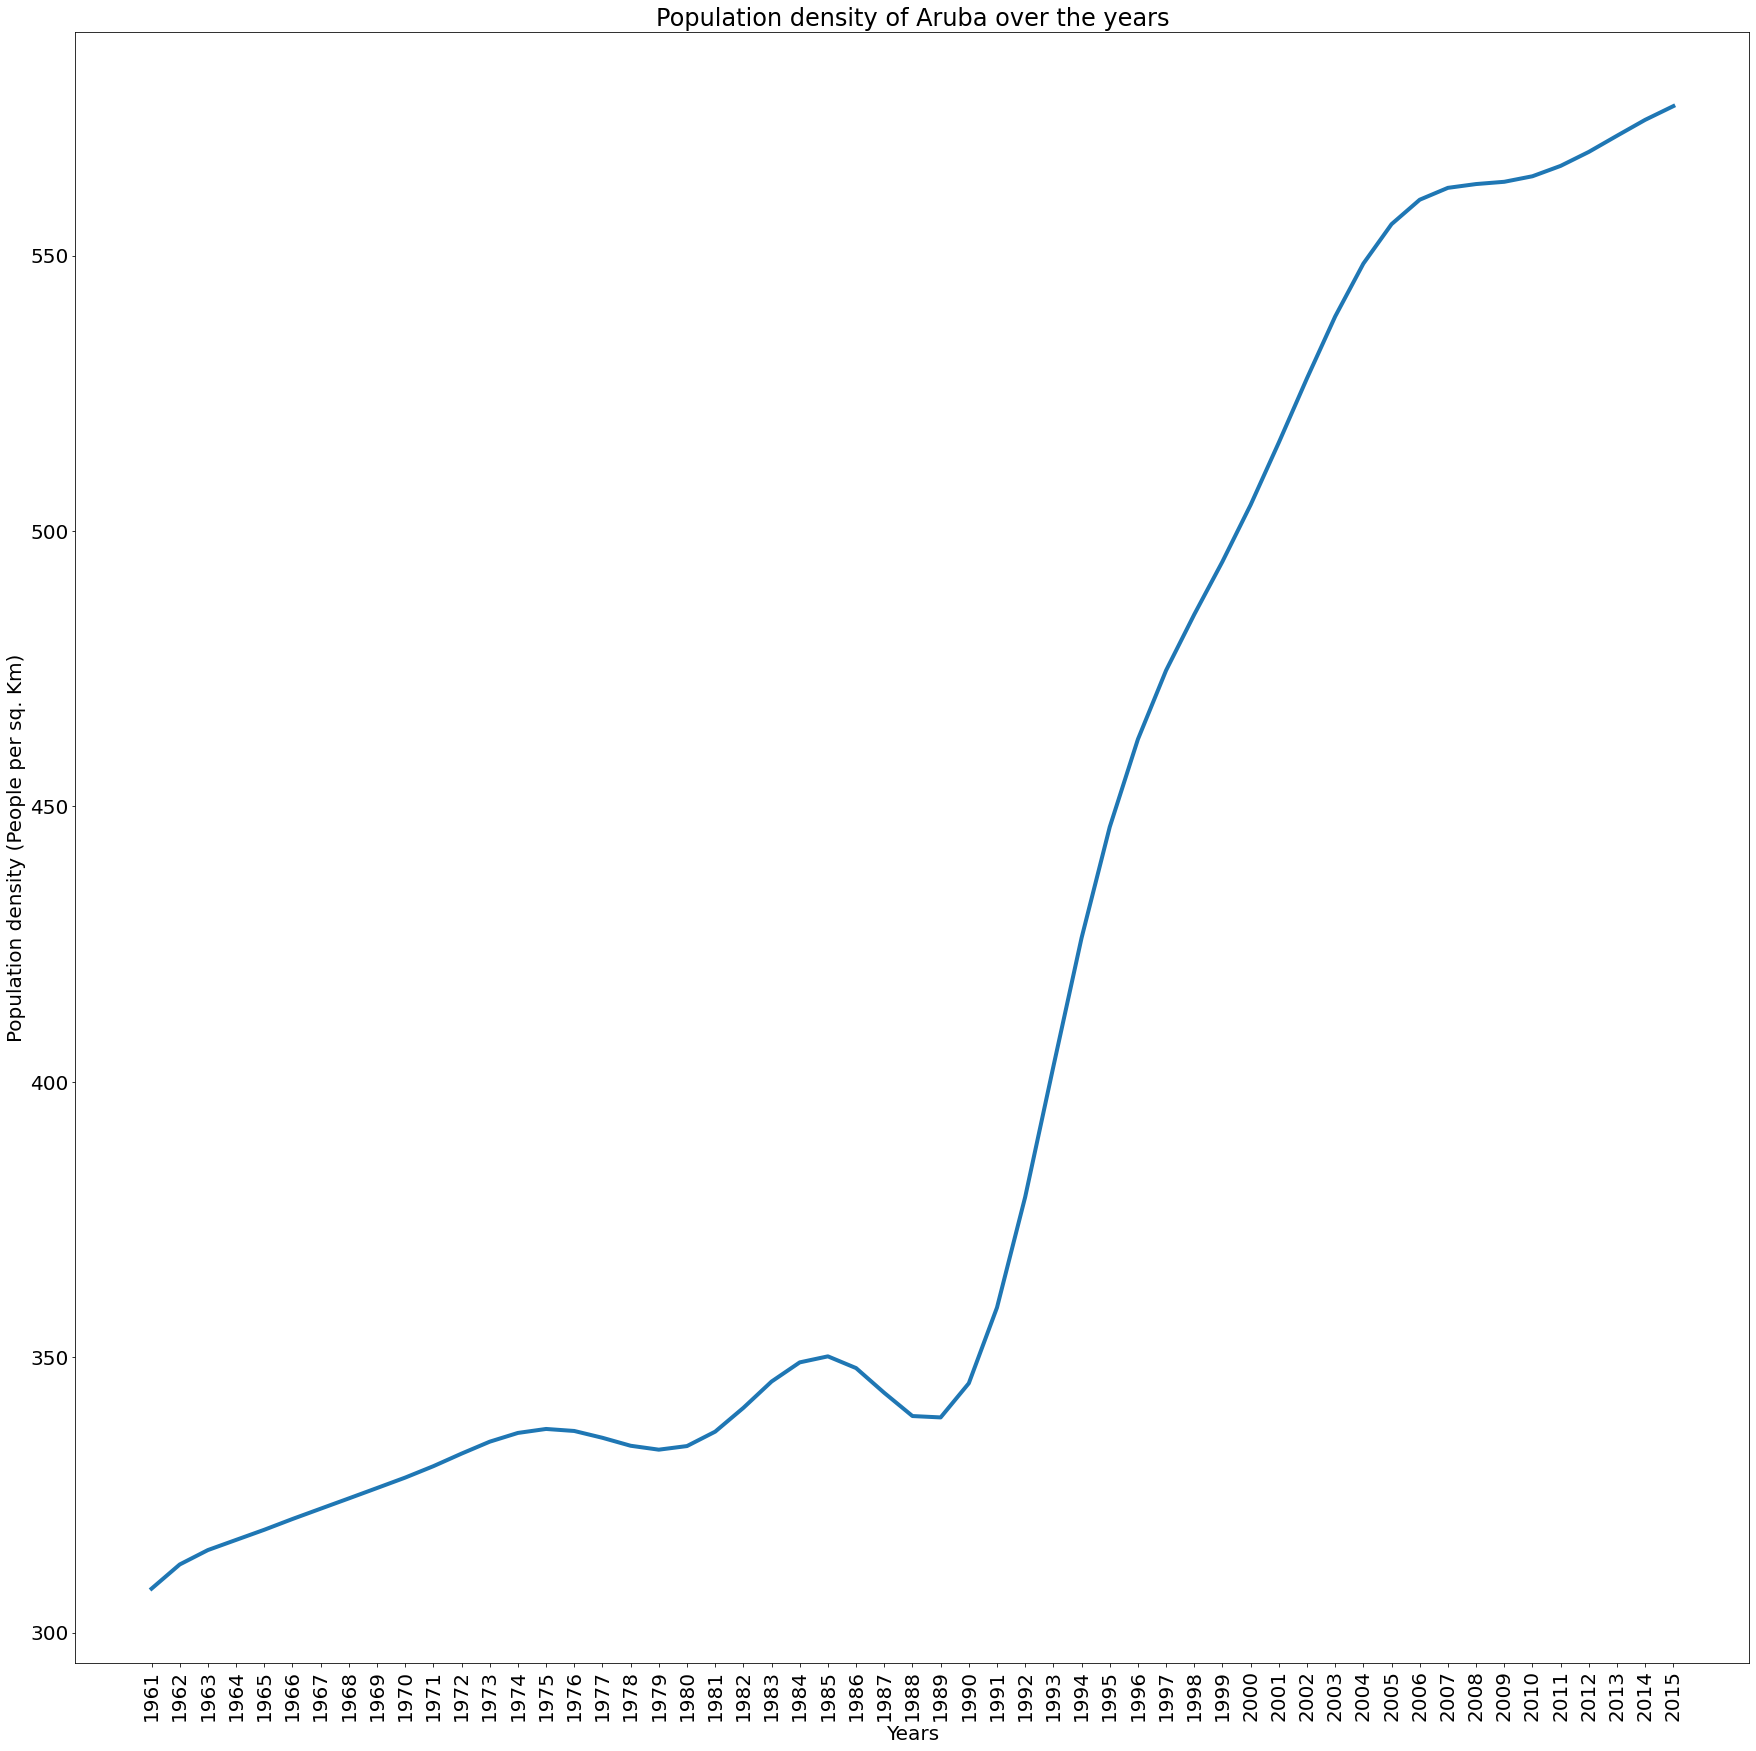

In [6]:
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams['font.size'] = '20'
plt.title('Population density of ' + country + ' over the years')
plt.xlabel('Years')
plt.xticks(rotation = '90')
plt.ylabel('Population density (People per sq. Km)')
plt.plot(x, y, linewidth = 4)

The plot is now much more interpretable.
From the plot above for Aruba, we can see that there was a steady rise in the population density uptil the 1980s. From 1990s, the density shot up drastically and continued to show the same growth till it became steady in mid 2000s.

We can also compare multiple countries together by plotting them on the same graph.
Let's take the first 5 countries from the dataset and compare their growth. But as there will be multiple graphs it is a good practice to show a legend that helps the viewer see which graph belongs to which country.

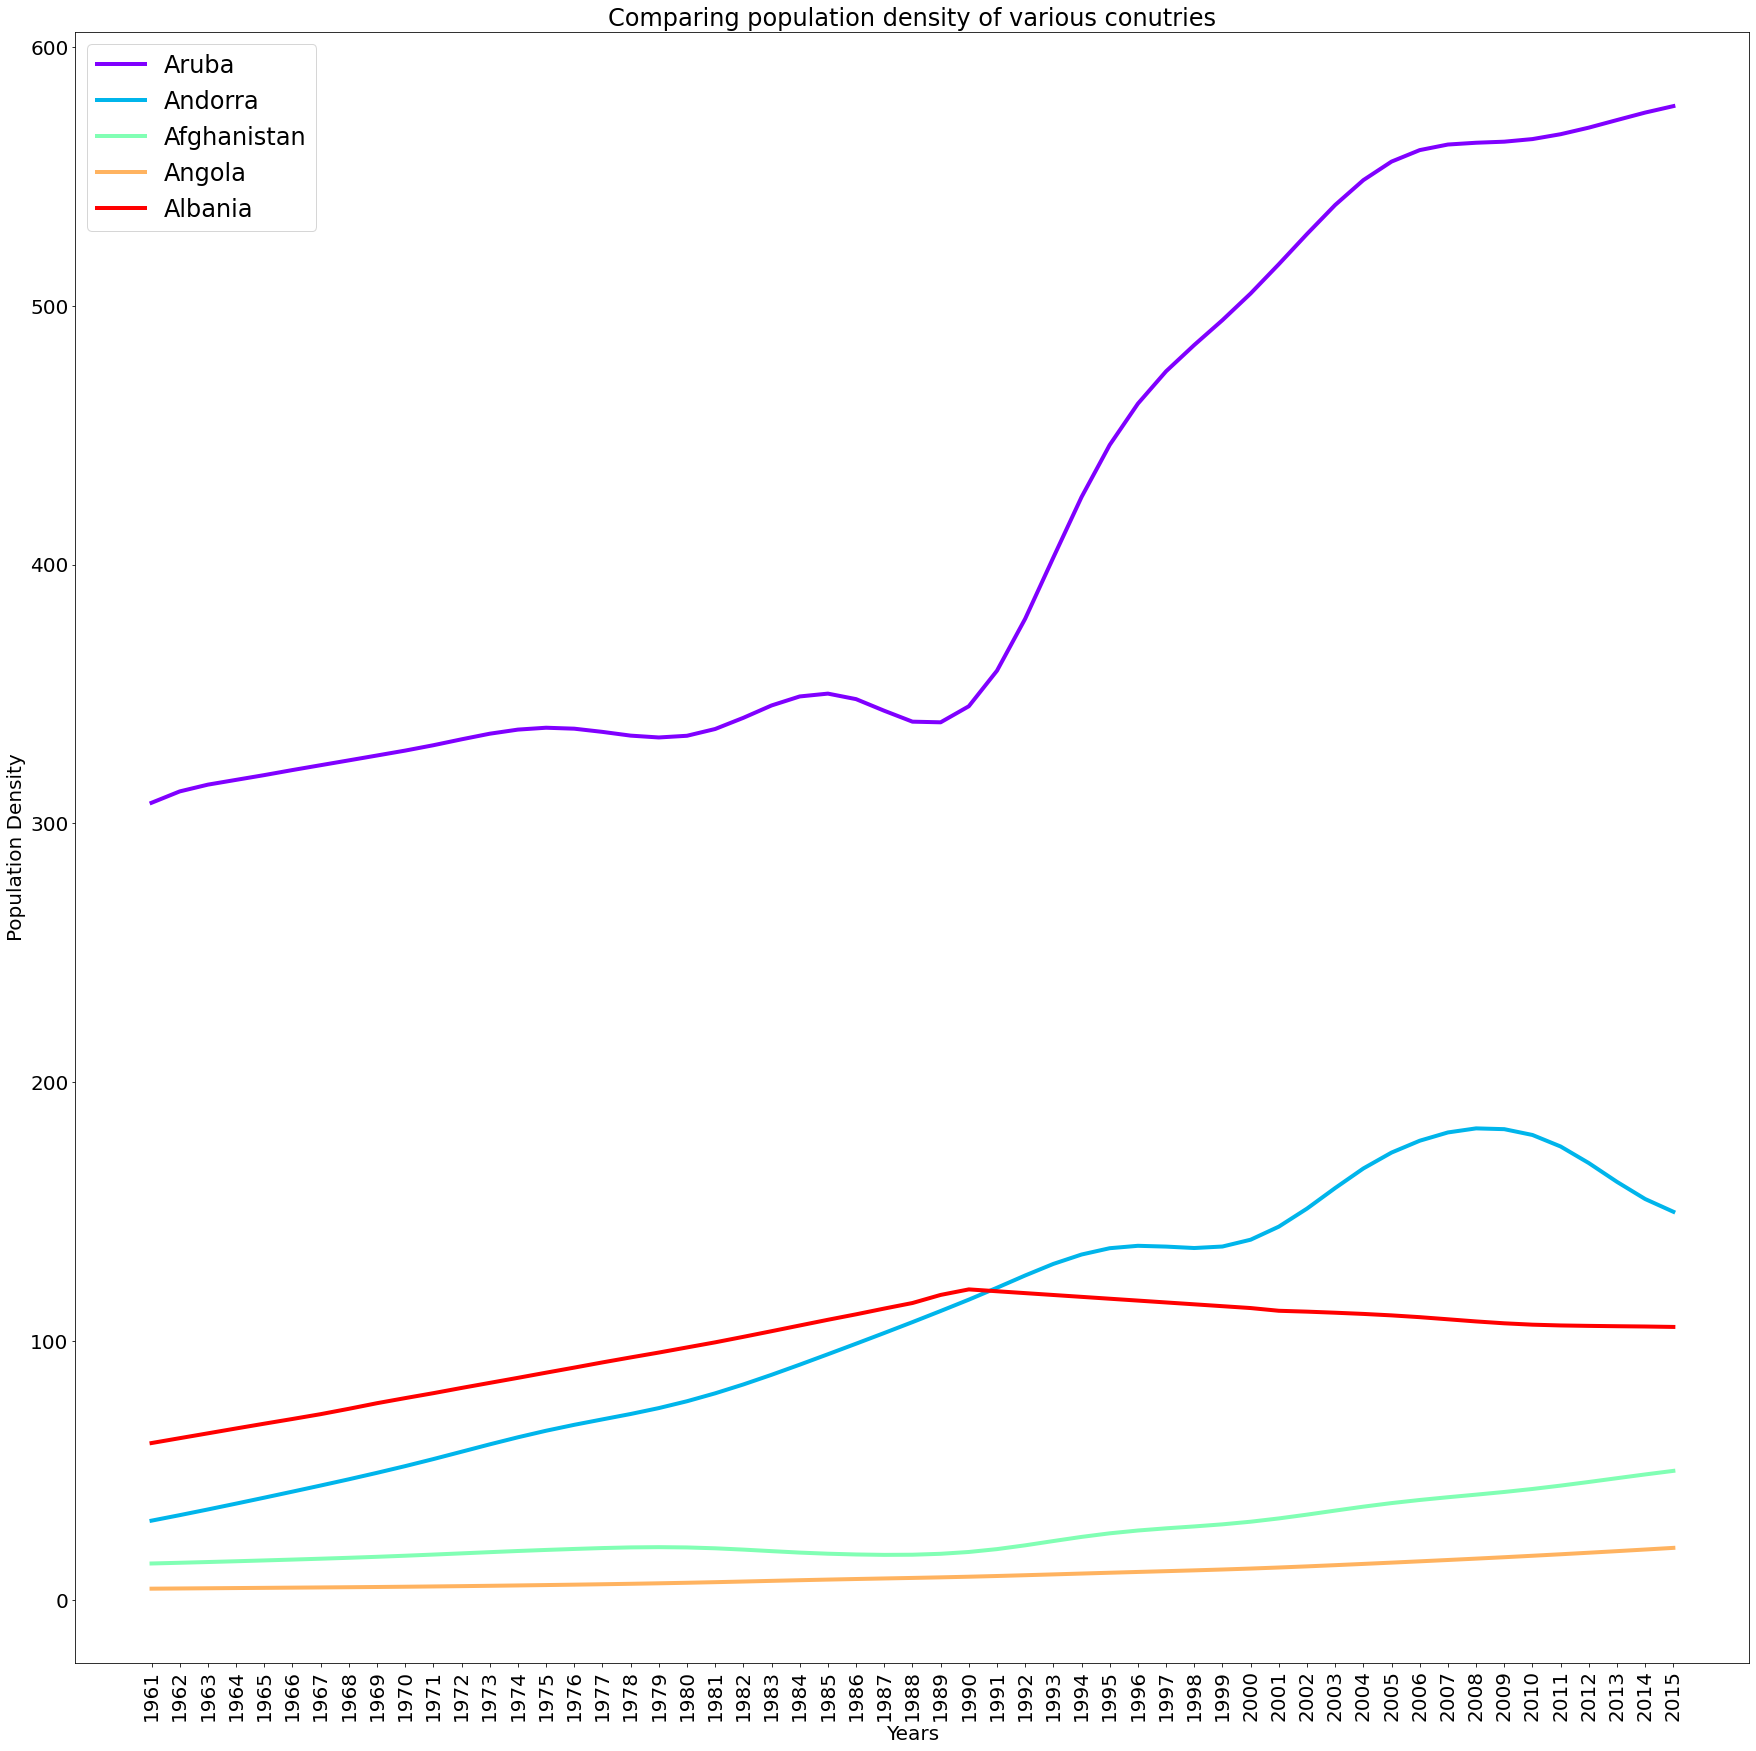

In [7]:
x = dataset.columns[1:]
colors = cm.rainbow(np.linspace(0, 1, 5))

for index in range(5):
    y = dataset.iloc[index][1:]
    plt.plot(x, 
             y, 
             c = colors[index],
             label = dataset.iloc[index][0],
             linewidth = 4)
    plt.title('Comparing population density of various conutries')
    plt.xlabel('Years')
    plt.xticks(rotation = '90')
    plt.ylabel('Population Density')
    plt.legend(prop = {'size': 24})

We can see that for all 5 countries, Aruba, Andorra, Afghanistan, Angola and Albania there has been a rise in the population density. Now that we have plot all their line graphs on a single plot, it's very easy to see that Aruba always has had higher population density as compared to other 4 countries.

### Bar Plot

We analyse that the trend for population density grows with as the years progress. Thus, we can compare the final population density of various countries and check which countries are the most densely populated.
Further, we can use more descriptive variable names for better code readability.

<BarContainer object of 251 artists>

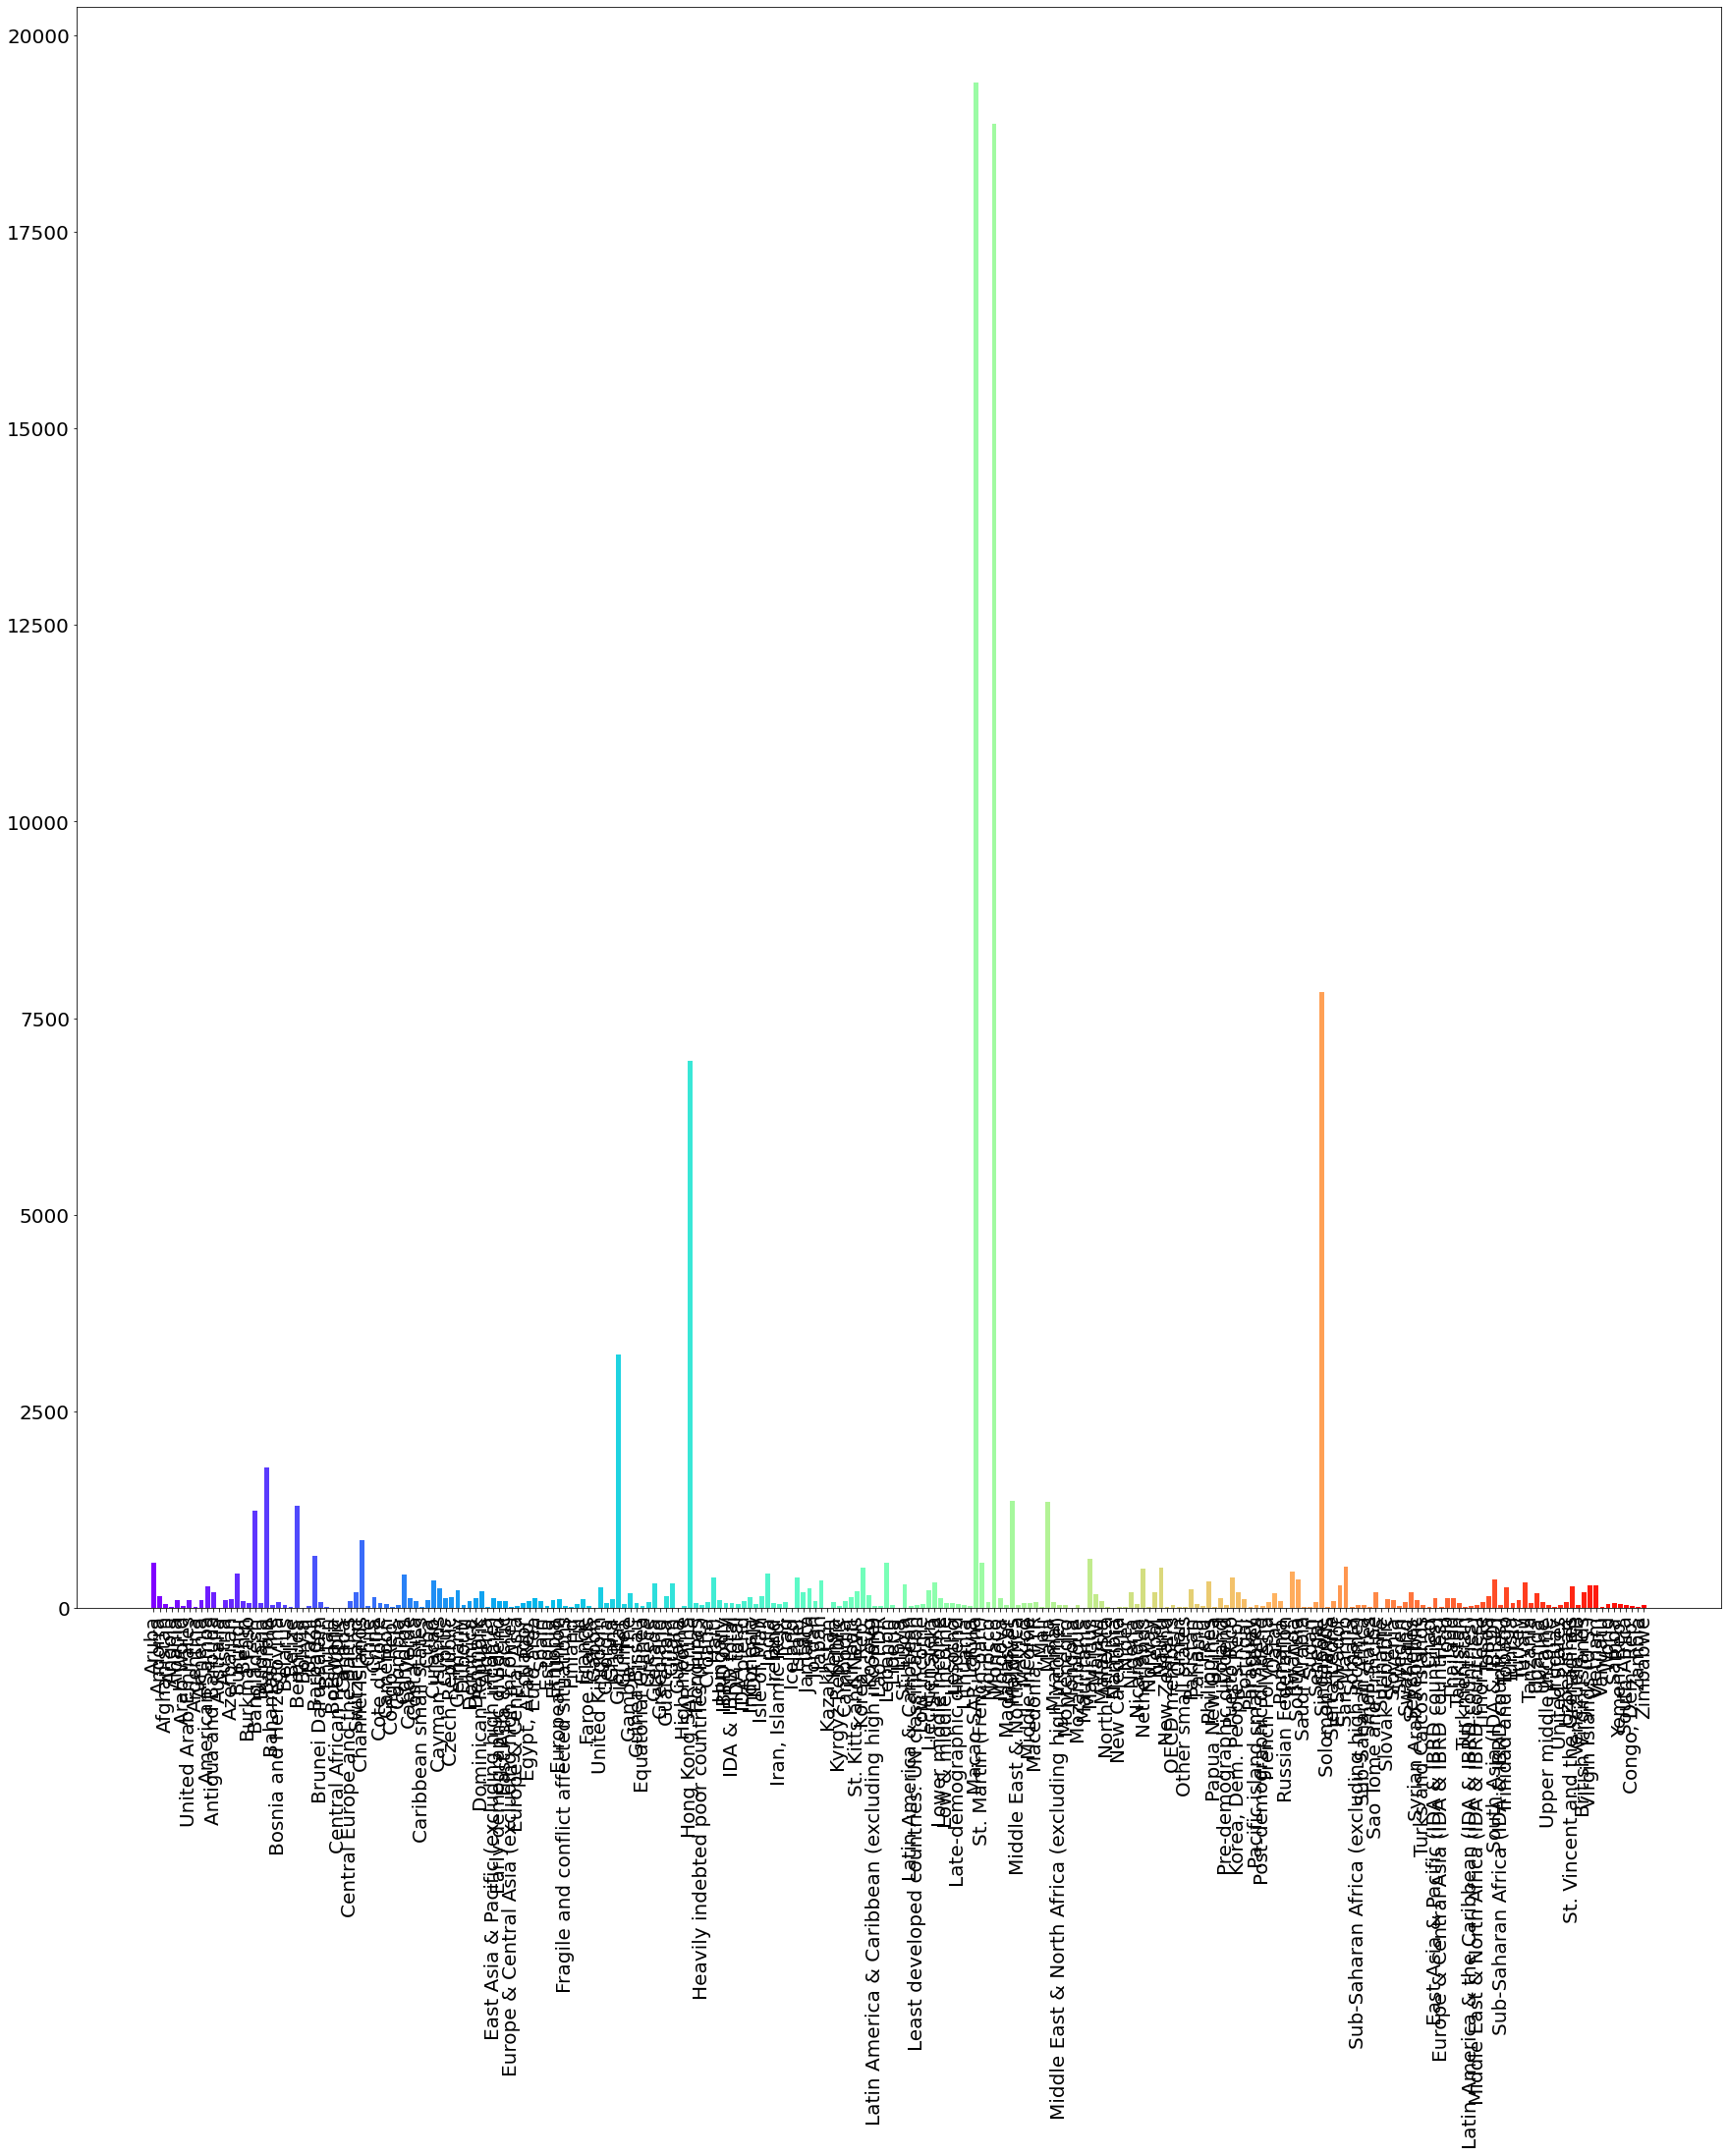

In [8]:
countries = dataset['Country Name']
populationDensity2015 = dataset['2015']
plt.xticks(rotation = '90')
plt.bar(countries, populationDensity2015, color = cm.rainbow(np.linspace(0, 1, len(countries))))

Even though this looks good (excluding the x-axis labels) this is not at all useful to us as there is so much overlapping that we cannot associate a given bar to a specific country. We can simplify this by just taking the top 10 out of these countries.

<BarContainer object of 10 artists>

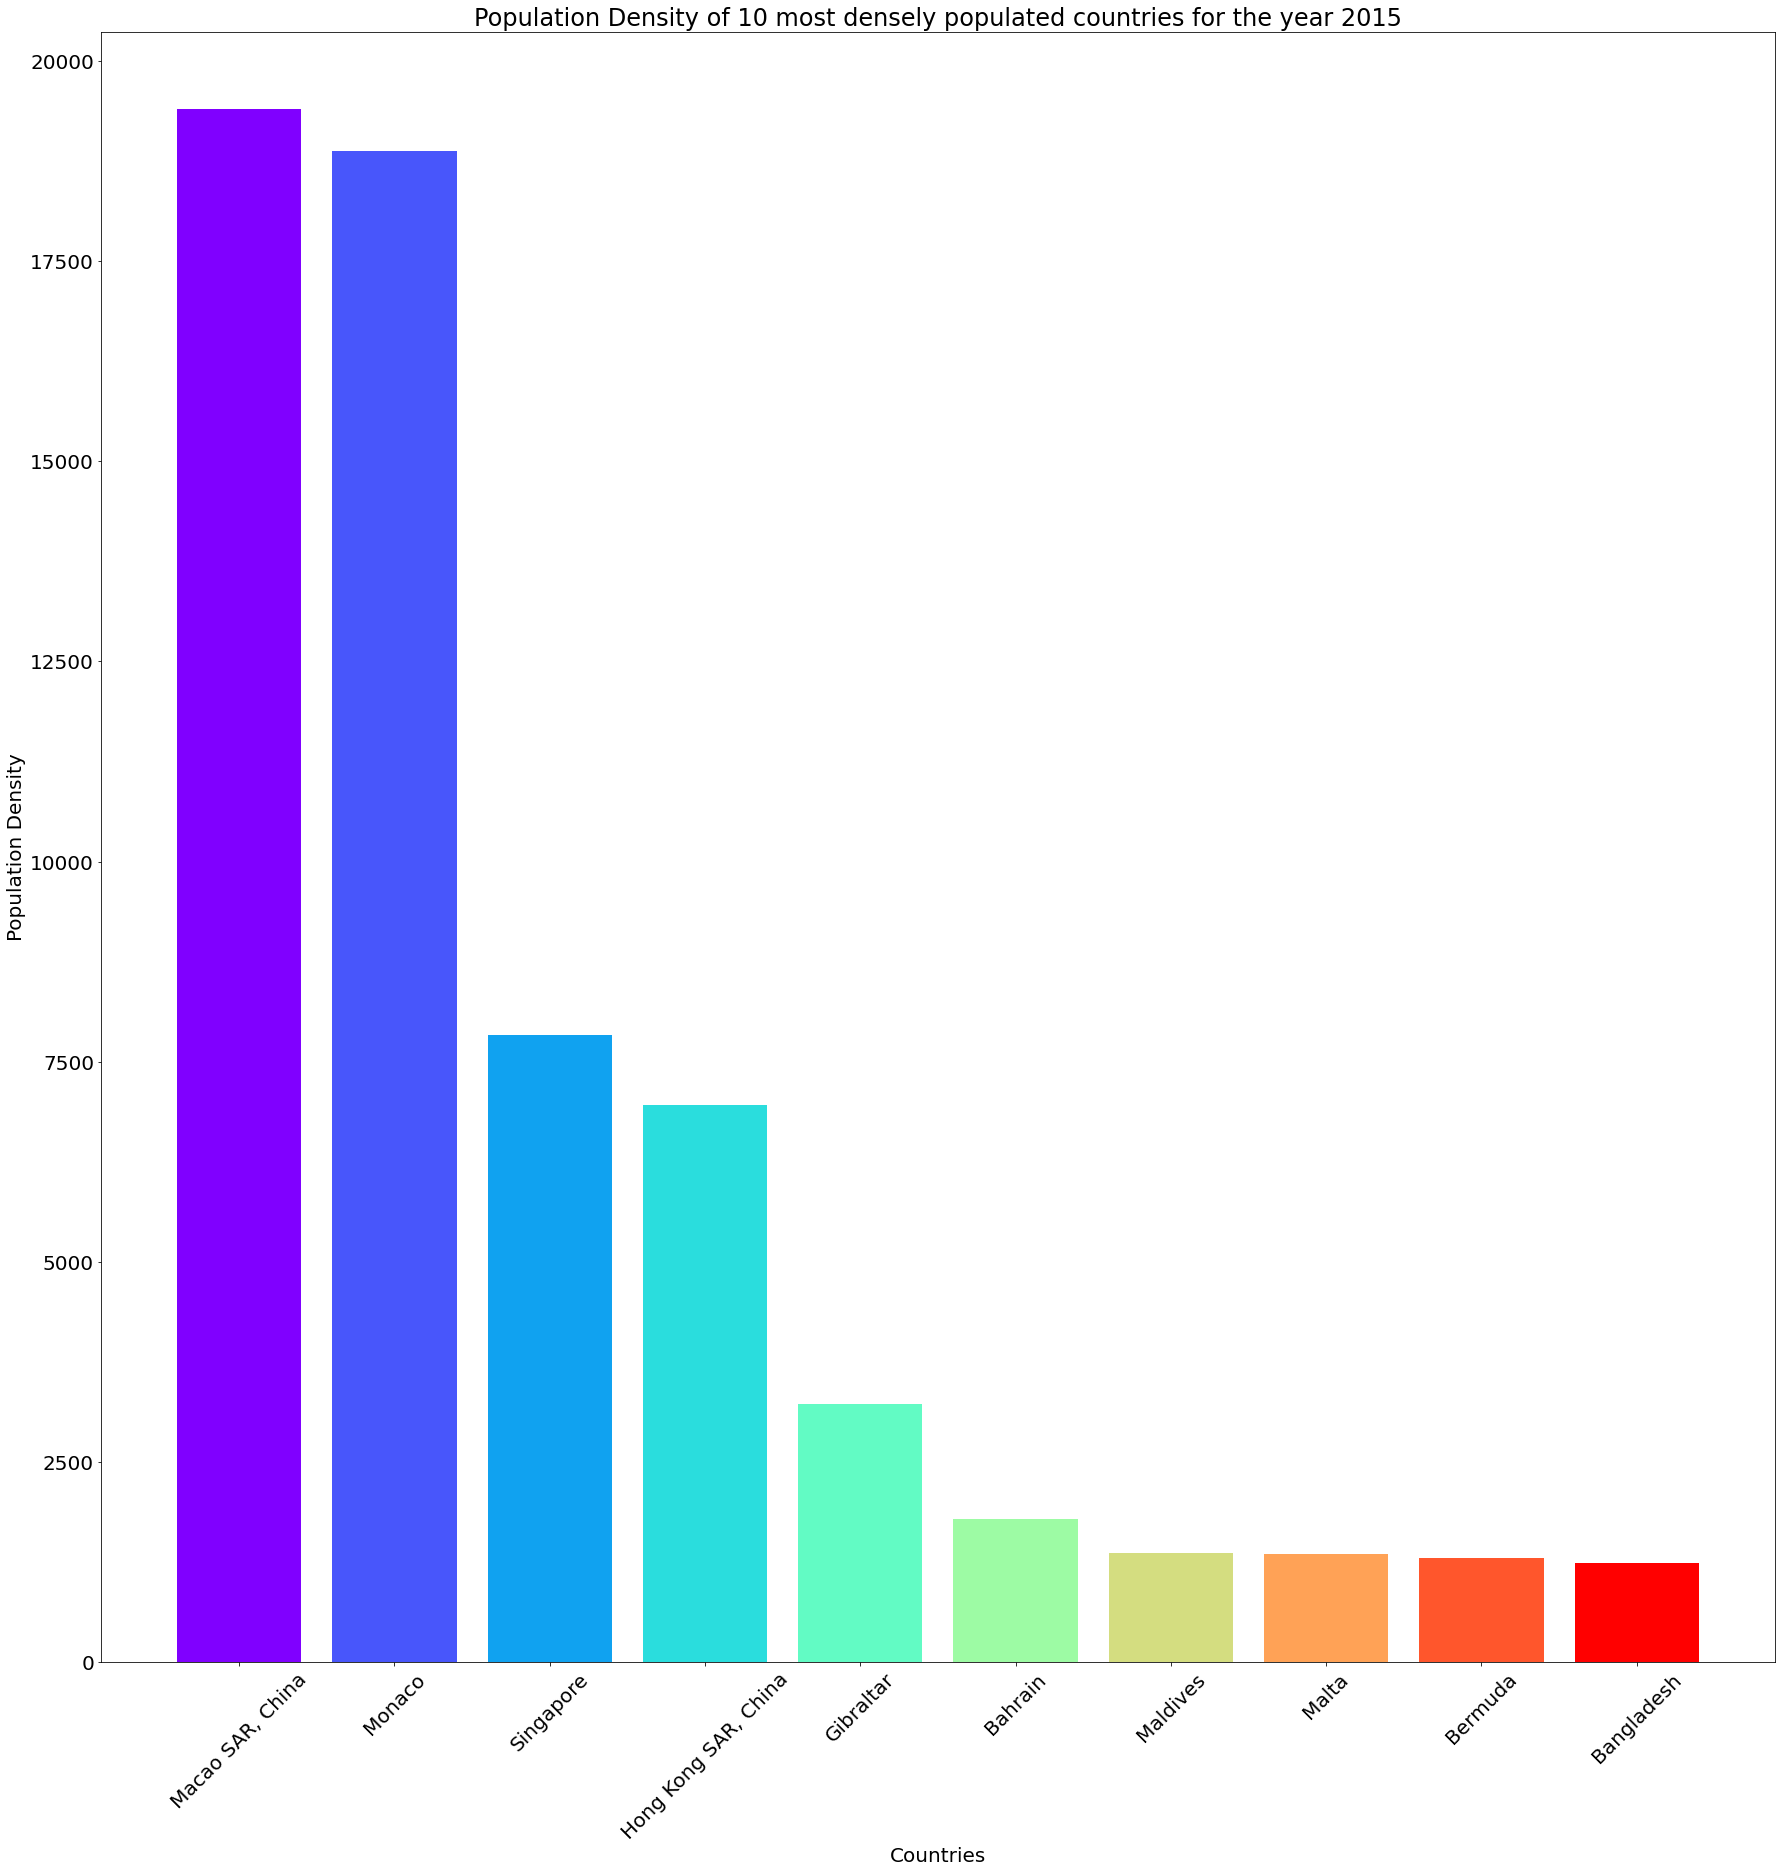

In [9]:
top10 = dataset.sort_values('2015', ascending = False).head(10)
plt.xticks(rotation = '45')
plt.title('Population Density of 10 most densely populated countries for the year 2015')
plt.xlabel('Countries')
plt.ylabel('Population Density')
plt.bar(top10['Country Name'],
        top10['2015'],
        color = cm.rainbow(np.linspace(0, 1, len(top10))))

From the graph above, we can see that Macao SAR and Monaco have the maximum population density in the year 2015.

### Scatter Plot

Next, we can get a overview of the dataset by using a scatter plot for various countries. As for some countries, the density is vastly different from others, we skip them to understand the data for the remaining countries. We will select countries where the average density is less than or equal to 10 people per square Km.

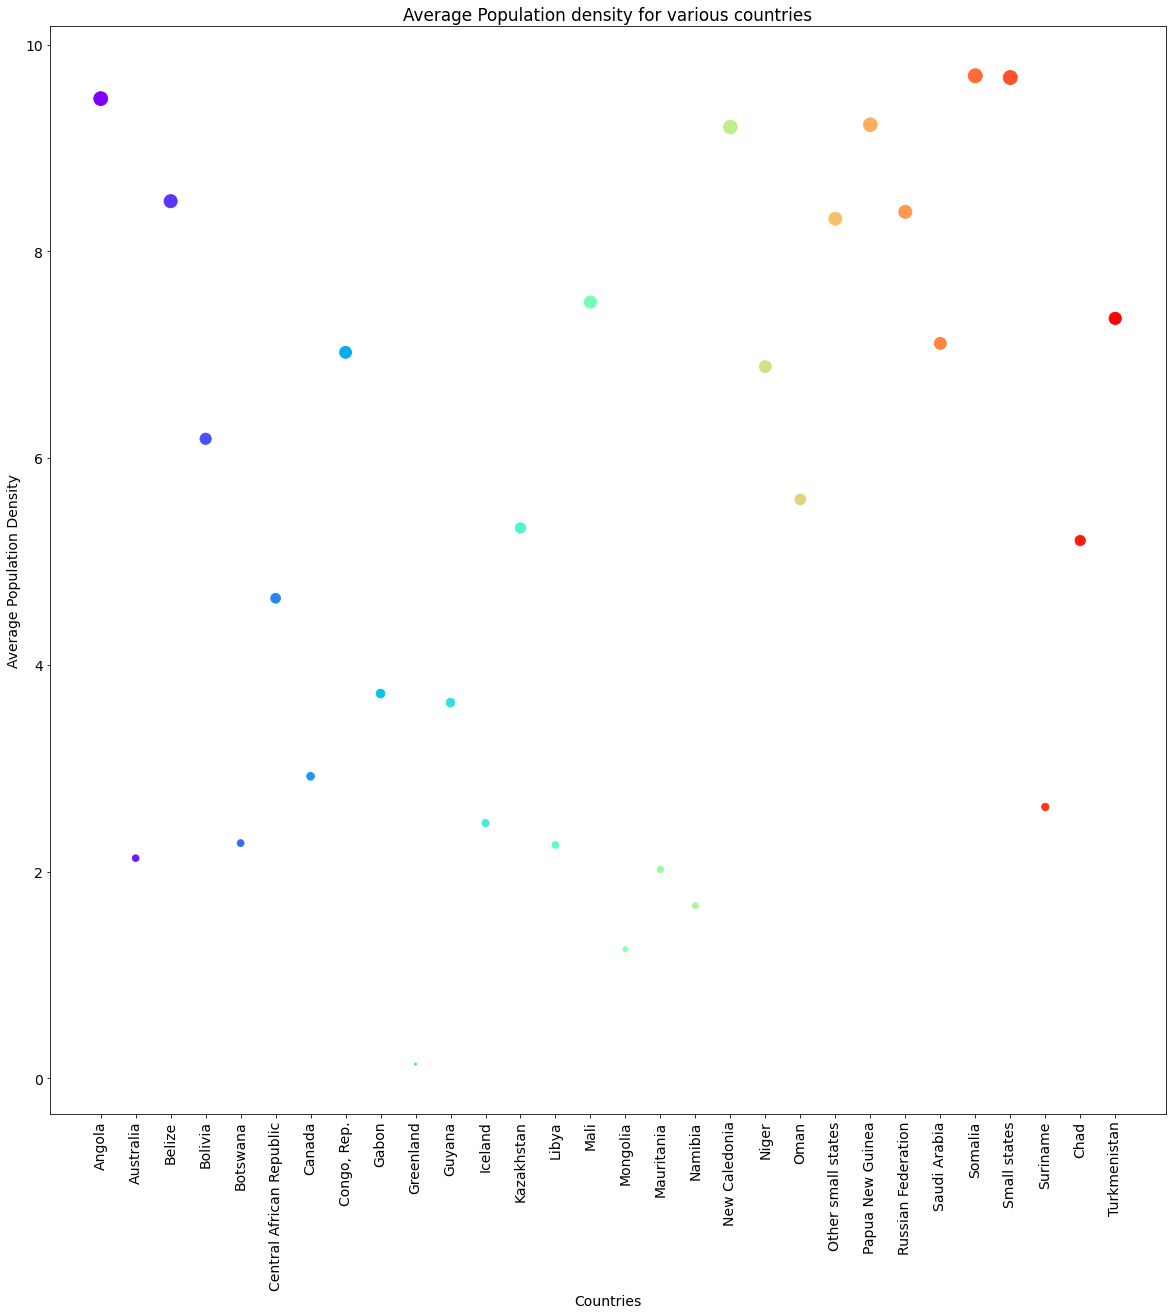

In [10]:
total_columns = dataset.shape[1]
selected_data = dataset[dataset.sum(axis = 1).apply(lambda x: x/total_columns) <= 10]
consolidated_data = selected_data.sum(axis = 1).apply(lambda x: x/total_columns)
countries = selected_data['Country Name']
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
plt.title('Average Population density for various countries')
plt.xlabel('Countries')
plt.ylabel('Average Population Density')
plt.xticks(rotation = '90')
plt.scatter(countries, 
            consolidated_data, 
            s = consolidated_data*20, 
            c = cm.rainbow(np.linspace(0, 1, len(countries))))

The size of each point is a reflection of the density value. The scatter plot is for all countries that have density of less than 10 people per sqaure Km. Moreover, `Greenland` has the lowest value for density.

## Descriptive Analysis

It would also be really useful to see the gap between the most and least densely populated areas over the years.

<BarContainer object of 55 artists>

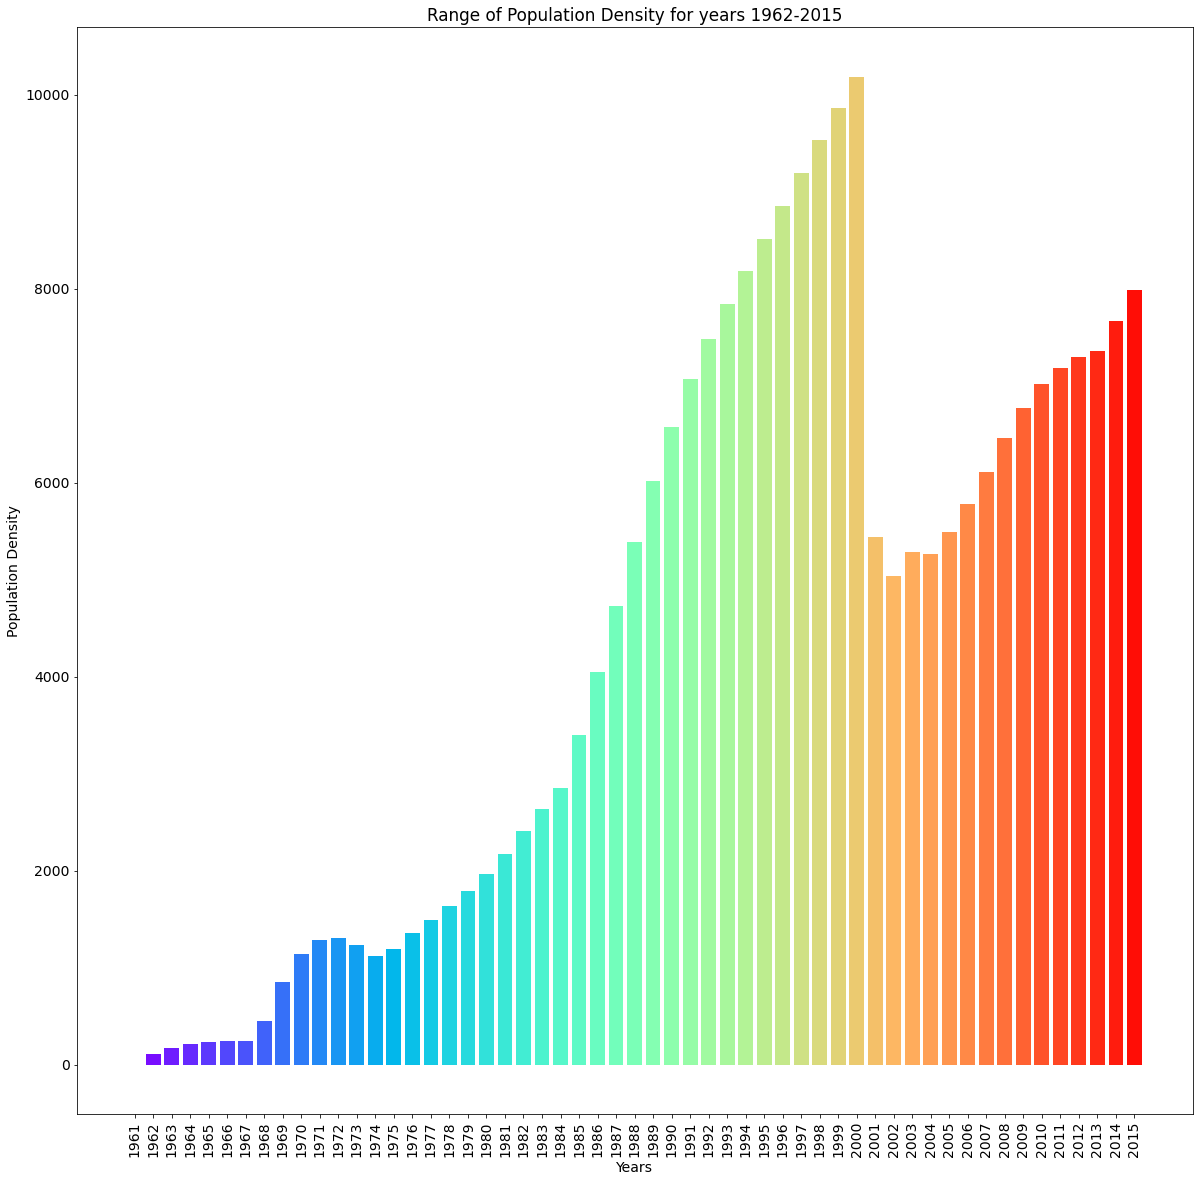

In [11]:
minimum = dataset.loc[:, dataset.columns != 'Country Name'].min()
maximum = dataset.loc[:, dataset.columns != 'Country Name'].max()
diff = maximum - minimum
minOfMax = maximum.min()
plt.title('Range of Population Density for years 1962-2015')
plt.xticks(rotation = '90')
plt.xlabel('Years')
plt.ylabel('Population Density')
plt.bar(dataset.columns[1:], diff.apply(lambda x: x-minOfMax), color = cm.rainbow(np.linspace(0, 1, dataset.shape[1])))

We see that for the year `2001` there was the maximum gap between the most densely populated country and the least densely populated country and then there was a sharp fall in the year `2002`.

## Population vs Population Density

If we can find the areas of each country, we can get their total population in the year 2015. We can then compare if the population density is a good measure and if it aligns with the population of a country.

In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

content = BeautifulSoup(urlopen('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area'),
                        'html.parser')

In [13]:
dataset['Area'] = 0.0
table = content.find_all('table')[0]
rows = table.find_all('tr')
for tr in rows:
    td = tr.find_all('td')
    a = tr.find('a')
    try:
        area = td[3].text.split(' (')[0].replace(',', '')
        if area.isnumeric():
            dataset.loc[dataset['Country Name'] == a.text, 'Area'] = int(area)
        else:
            dataset.loc[dataset['Country Name'] == a.text, 'Area'] = 0
    except Exception:
        continue

In [14]:
dataset = dataset[dataset['Area'] != 0]
dataset.shape

(170, 57)

For the year 2015, we'd like to compare the population of various countries and their population density.

<BarContainer object of 20 artists>

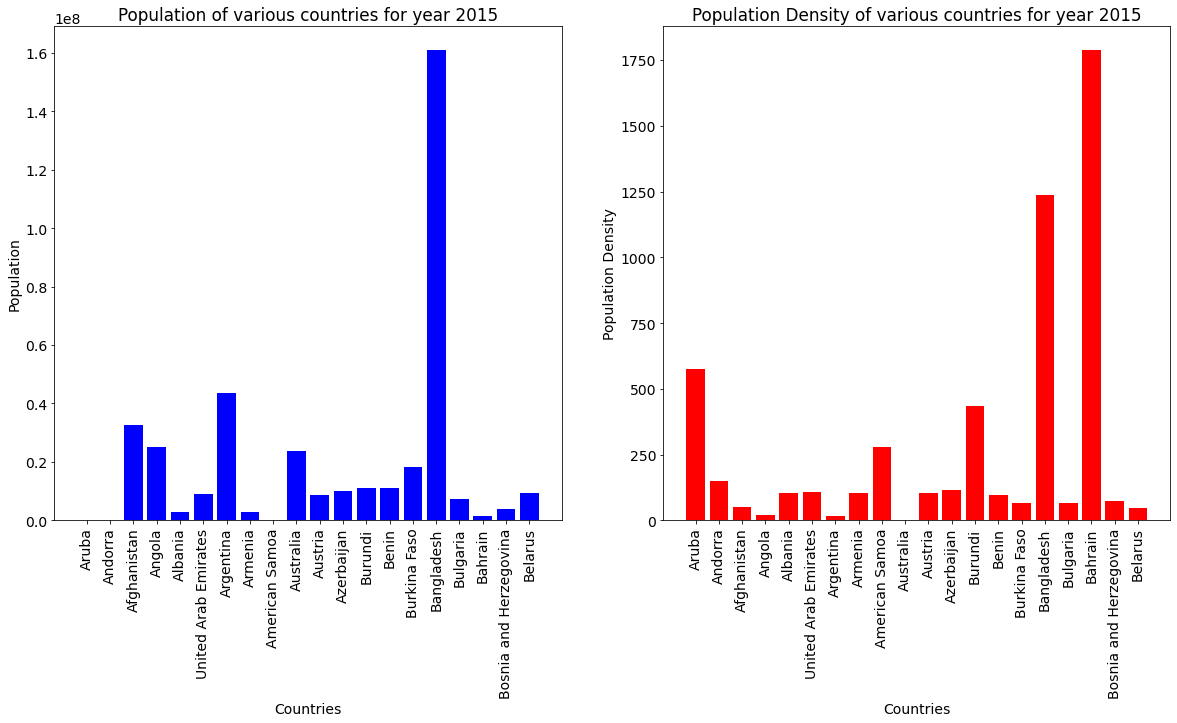

In [15]:
population = dataset['Area'].multiply(dataset['2015'], axis = 0)
countries = dataset['Country Name']

plt.subplot(2,2,1)
plt.title('Population of various countries for year 2015')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.xticks(rotation = '90')
plt.bar(countries[:20], population[:20], color = 'b')

plt.subplot(2,2,2)
plt.title('Population Density of various countries for year 2015')
plt.xlabel('Countries')
plt.ylabel('Population Density')
plt.xticks(rotation = '90')
plt.bar(countries[:20], dataset['2015'][:20], color = 'r')

We can see that `Population Density` is not always the correct measure to describe the population of a country. This is evident when we look at the country `Bahrain`. Even though the population density is very high for it, the population for `Bangladesh` is much higher than `Bahrain`.

## Conclusion

In this notebook, we used several `matplotlib` plots to understand the world population data and draw inferences from them.